# 0.0 KNN - Classifier

## 0.1 Imports

In [ ]:
import pandas                                 as pd
import numpy                                  as np

from matplotlib              import pyplot    as plt

from sklearn                 import metrics   as mt
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

## 0.2 Load Dataset

In [ ]:
# X training / test / validation
path_X_training = './training_test_validation/X_training.csv'
df_X_training = pd.read_csv(path_X_training)
path_X_test = './training_test_validation/X_test.csv'
df_X_test = pd.read_csv(path_X_test)
path_X_validation = './training_test_validation/X_validation.csv'
df_X_validation = pd.read_csv(path_X_validation)

# y training / test / validation
path_y_training = './training_test_validation/y_training.csv'
df_y_training = pd.read_csv(path_y_training)
path_y_test = './training_test_validation/y_test.csv'
df_y_test = pd.read_csv(path_y_test)
path_y_validation = './training_test_validation/y_validation.csv'
df_y_validation = pd.read_csv(path_y_validation)

In [ ]:
df_X_training.head(5)

,id,customer_type,age,class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,...,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,gender_Female,gender_Male,type_of_travel_business_travel,type_of_travel_personal_travel
0,13508,1,0.500000,0.0,0.039580,0.6,0.6,0.6,0.6,1.0,...,0.5,1.00,0.6,0.4,0.000000,0.013848,1.0,0.0,1.0,0.0
1,28874,1,0.243590,0.0,0.205775,0.6,0.4,0.4,0.4,0.6,...,0.5,0.50,0.2,0.6,0.000000,0.000000,0.0,1.0,1.0,0.0
2,21484,0,0.435897,1.0,0.026858,0.6,0.6,0.6,0.2,1.0,...,0.0,1.00,0.6,1.0,0.000000,0.000000,1.0,0.0,1.0,0.0
3,48280,1,0.589744,0.5,0.041397,0.6,1.0,0.6,0.6,0.8,...,0.0,1.00,0.4,0.4,0.029499,0.020772,1.0,0.0,0.0,1.0
4,472,0,0.423077,1.0,0.016559,0.2,0.2,0.2,0.8,0.6,...,1.0,0.75,0.8,0.6,0.021632,0.019782,0.0,1.0,1.0,0.0


In [ ]:
df_y_training.head(5)

,0
0,1
1,1
2,0
3,0
4,0


## 0.3 Features

In [ ]:
features = ['id', 'customer_type', 'age', 'class', 'flight_distance',
       'inflight_wifi_service', 'departure_arrival_time_convenient',
       'ease_of_online_booking', 'gate_location', 'food_and_drink',
       'online_boarding', 'seat_comfort', 'inflight_entertainment',
       'on_board_service', 'leg_room_service', 'baggage_handling',
       'checkin_service', 'inflight_service', 'cleanliness',
       'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'gender_Female', 'gender_Male', 'type_of_travel_business_travel',
       'type_of_travel_personal_travel']

X_train = df_X_training.loc[:, features]
y_train = df_y_training.values

## 0.4 Training

### 0.4.1 Encontrar melhor valor de k

In [ ]:
# Define o modelo
model = KNeighborsClassifier()

# Define os valores de k que deseja testar
param_grid = {'n_neighbors': np.arange(1, 21)}

# Realiza a busca com validação cruzada
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Melhor valor de k
best_k = grid_search.best_params_['n_neighbors']
print(f"Melhor valor de k: {best_k}")

/home/jz1nn/.pyenv/versions/3.8.20/envs/curso-machine-learning/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/jz1nn/.pyenv/versions/3.8.20/envs/curso-machine-learning/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/jz1nn/.pyenv/versions/3.8.20/envs/curso-machine-learning/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/jz1nn/.pyenv/versions/3.8.20/envs/curso-machine-learnin

Melhor valor de k: 1


/home/jz1nn/.pyenv/versions/3.8.20/envs/curso-machine-learning/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


### 0.4.2 Treinamento usando o melhor valor de k

In [ ]:
# Modelo final com o melhor valor de k
final_model = KNeighborsClassifier(n_neighbors=best_k)
final_model.fit(X_train, y_train)

/home/jz1nn/.pyenv/versions/3.8.20/envs/curso-machine-learning/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=1)

## 0.5 Performance

### 0.5.1 Perfomance sobre dados de Treino

In [ ]:
# Classificacao sobre os dados de treinamento
yhat_train = final_model.predict(X_train)

df_result = X_train.copy()
df_result['classificacao'] = yhat_train

In [ ]:
# Classificacao sobre os dados de treinamento
print('Métricas - treino:')
print('Acurácia:', mt.accuracy_score(y_train, yhat_train))
print('Precisão:', mt.precision_score(y_train, yhat_train))
print('Recall:', mt.recall_score(y_train, yhat_train))
print('F1:', mt.f1_score(y_train, yhat_train))

Métricas - treino:
Acurácia: 1.0
Precisão: 1.0
Recall: 1.0
F1: 1.0


### 0.5.2 Perfomance sobre dados de Validacao

In [ ]:
# Classificacao sobre os dados de validacao
yhat_val = final_model.predict(df_X_validation)

df_result = df_X_validation.copy()
df_result['classificacao'] = yhat_val

In [ ]:
# Validação
print('Métricas - validação:')
print('Acurácia:', mt.accuracy_score(df_y_validation, yhat_val))
print('Precisão:', mt.precision_score(df_y_validation, yhat_val))
print('Recall:', mt.recall_score(df_y_validation, yhat_val))
print('F1:', mt.f1_score(df_y_validation, yhat_val))

Métricas - validação:
Acurácia: 0.6785289101965958
Precisão: 0.6262340301974448
Recall: 0.6405078328012473
F1: 0.6332905120205543


### 0.5.3 Perfomance sobre dados de Teste

In [ ]:
# Classificacao sobre os dados de validacao
yhat_test = final_model.predict(df_X_test)

df_result = df_X_test.copy()
df_result['classificacao'] = yhat_test

In [ ]:
# Teste
print('\nMétricas - teste:')
print('Acurácia:', mt.accuracy_score(df_y_test, yhat_test))
print('Precisão:', mt.precision_score(df_y_test, yhat_test))
print('Recall:', mt.recall_score(df_y_test, yhat_test))
print('F1:', mt.f1_score(df_y_test, yhat_test))


Métricas - teste:
Acurácia: 0.678368671069401
Precisão: 0.6321009134406264
Recall: 0.6393312802463704
F1: 0.6356955380577427


## 0.6 Visualizacao grafica valores de k

/home/jz1nn/.pyenv/versions/3.8.20/envs/curso-machine-learning/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/jz1nn/.pyenv/versions/3.8.20/envs/curso-machine-learning/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/jz1nn/.pyenv/versions/3.8.20/envs/curso-machine-learning/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/jz1nn/.pyenv/versions/3.8.20/envs/curso-machine-learnin

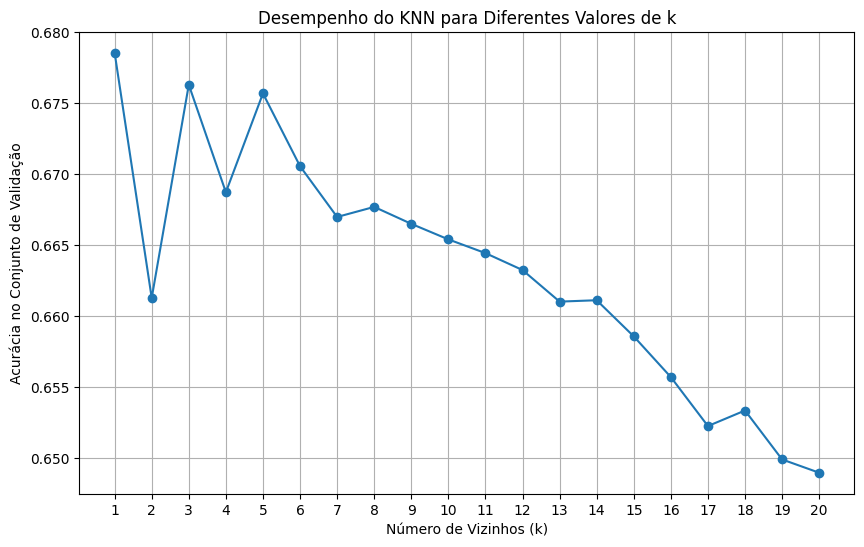

In [ ]:
# Lista para armazenar as acurácias para cada valor de k
k_values = range(1, 21)
accuracy_scores = []

# Loop para testar cada valor de k
for k in k_values:
    # Cria o modelo com o valor atual de k
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    
    # Faz previsões no conjunto de validação
    yhat_val = model.predict(df_X_validation)
    
    # Calcula a acurácia e armazena
    acc = mt.accuracy_score(df_y_validation, yhat_val)
    accuracy_scores.append(acc)

# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-')
plt.xlabel('Número de Vizinhos (k)')
plt.ylabel('Acurácia no Conjunto de Validação')
plt.title('Desempenho do KNN para Diferentes Valores de k')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# 1.0 Decision Tree - Classifier

## 1.1 Imports

In [ ]:
import pandas                                    as pd
import numpy                                     as np

from matplotlib              import pyplot       as plt

from sklearn                 import linear_model as lm
from sklearn                 import ensemble     as en
from sklearn                 import metrics      as mt
from sklearn.model_selection import GridSearchCV

## 1.2 Load Dataset

In [ ]:
# X training / test / validation
path_X_training = './training_test_validation/X_training.csv'
df_X_training = pd.read_csv(path_X_training)
path_X_test = './training_test_validation/X_test.csv'
df_X_test = pd.read_csv(path_X_test)
path_X_validation = './training_test_validation/X_validation.csv'
df_X_validation = pd.read_csv(path_X_validation)

# y training / test / validation
path_y_training = './training_test_validation/y_training.csv'
df_y_training = pd.read_csv(path_y_training)
path_y_test = './training_test_validation/y_test.csv'
df_y_test = pd.read_csv(path_y_test)
path_y_validation = './training_test_validation/y_validation.csv'
df_y_validation = pd.read_csv(path_y_validation)

## 1.3 Features

In [ ]:
features = ['id', 'customer_type', 'age', 'class', 'flight_distance',
       'inflight_wifi_service', 'departure_arrival_time_convenient',
       'ease_of_online_booking', 'gate_location', 'food_and_drink',
       'online_boarding', 'seat_comfort', 'inflight_entertainment',
       'on_board_service', 'leg_room_service', 'baggage_handling',
       'checkin_service', 'inflight_service', 'cleanliness',
       'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'gender_Female', 'gender_Male', 'type_of_travel_business_travel',
       'type_of_travel_personal_travel']

X_train = df_X_training.loc[:, features]
y_train = df_y_training.values.ravel()

## 1.4 Training

### 1.4.1 Encontrar o melhor valor de C, solver e max_iter

In [ ]:
# Parametros de busca
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100, 1e5],   # Regularização
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],  # Otimizadores
    'max_iter': [100, 200, 500, 1000]    # Iterações máximas
}

# Configuração do modelo e da busca em grade com validação cruzada
model = lm.LogisticRegression(random_state=0)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Execução da busca e obtenção do melhor modelo
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(f"Melhores parâmetros encontrados: {best_params}")

/home/jz1nn/.pyenv/versions/3.8.20/envs/curso-machine-learning/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/jz1nn/.pyenv/versions/3.8.20/envs/curso-machine-learning/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/jz1nn/.pyenv/versions/3.8.20/envs/curso-machine-learning/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/jz1nn/.pyenv/versions/3.8.20/envs/curso-machine-learning/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorith

Melhores parâmetros encontrados: {'C': 1, 'max_iter': 200, 'solver': 'newton-cg'}


/home/jz1nn/.pyenv/versions/3.8.20/envs/curso-machine-learning/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:416: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/home/jz1nn/.pyenv/versions/3.8.20/envs/curso-machine-learning/lib/python3.8/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


### 1.4.2 Treinamento usando o melhor valor de n_estimators e max_depth

In [ ]:
best_model = lm.LogisticRegression(**best_params, random_state=0)
best_model.fit(X_train, y_train)

/home/jz1nn/.pyenv/versions/3.8.20/envs/curso-machine-learning/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/jz1nn/.pyenv/versions/3.8.20/envs/curso-machine-learning/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/jz1nn/.pyenv/versions/3.8.20/envs/curso-machine-learning/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:416: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/home/jz1nn/.pyenv/versions/3.8.20/envs/curso-machine-learning/lib/python3.8/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


LogisticRegression(C=1, max_iter=200, random_state=0, solver='newton-cg')

## 1.5 Performance

### 1.5.1 Performance sobre dados de Treino

In [ ]:
# Classificação sobre os dados de treinamento
yhat_train = best_model.predict(X_train)

df_result = X_train.copy()
df_result['classificacao'] = yhat_train

In [ ]:
# Classificacao sobre os dados de treinamento
print('Métricas - treino:')
print('Acurácia:', mt.accuracy_score(y_train, yhat_train))
print('Precisão:', mt.precision_score(y_train, yhat_train))
print('Recall:', mt.recall_score(y_train, yhat_train))
print('F1:', mt.f1_score(y_train, yhat_train))

Métricas - treino:
Acurácia: 0.8760946011170103
Precisão: 0.8716343765524094
Recall: 0.8374379534173348
F1: 0.8541940509225451


### 1.5.2 Performance sobre dados de Validacao

In [ ]:
# Classificacao sobre os dados de validacao
yhat_val = best_model.predict(df_X_validation)

df_result = df_X_validation.copy()
df_result['classificacao'] = yhat_val

In [ ]:
# Validação
print('Métricas - validação:')
print('Acurácia:', mt.accuracy_score(df_y_validation, yhat_val))
print('Precisão:', mt.precision_score(df_y_validation, yhat_val))
print('Recall:', mt.recall_score(df_y_validation, yhat_val))
print('F1:', mt.f1_score(df_y_validation, yhat_val))

Métricas - validação:
Acurácia: 0.8743524566427491
Precisão: 0.8693234476367007
Recall: 0.8356967852104833
F1: 0.8521785214066699


### 1.5.3 Performance sobre dados de Teste

In [ ]:
# Classificacao sobre os dados de validacao
yhat_test = best_model.predict(df_X_test)

df_result = df_X_test.copy()
df_result['classificacao'] = yhat_test

In [ ]:
# Teste
print('\nMétricas - teste:')
print('Acurácia:', mt.accuracy_score(df_y_test, yhat_test))
print('Precisão:', mt.precision_score(df_y_test, yhat_test))
print('Recall:', mt.recall_score(df_y_test, yhat_test))
print('F1:', mt.f1_score(df_y_test, yhat_test))


Métricas - teste:
Acurácia: 0.8714710539528058
Precisão: 0.8677587626979043
Recall: 0.8343158820941488
F1: 0.8507087744482325


# 2.0 Random Forest - Classifier

## 2.1 Imports

In [ ]:
import pandas                                 as pd
import numpy                                  as np

from matplotlib              import pyplot    as plt

from sklearn                 import ensemble  as en
from sklearn                 import metrics   as mt
from sklearn.model_selection import GridSearchCV

## 2.2 Load Dataset

In [ ]:
# X training / test / validation
path_X_training = './training_test_validation/X_training.csv'
df_X_training = pd.read_csv(path_X_training)
path_X_test = './training_test_validation/X_test.csv'
df_X_test = pd.read_csv(path_X_test)
path_X_validation = './training_test_validation/X_validation.csv'
df_X_validation = pd.read_csv(path_X_validation)

# y training / test / validation
path_y_training = './training_test_validation/y_training.csv'
df_y_training = pd.read_csv(path_y_training)
path_y_test = './training_test_validation/y_test.csv'
df_y_test = pd.read_csv(path_y_test)
path_y_validation = './training_test_validation/y_validation.csv'
df_y_validation = pd.read_csv(path_y_validation)

## 2.3 Features

In [ ]:
features = ['id', 'customer_type', 'age', 'class', 'flight_distance',
       'inflight_wifi_service', 'departure_arrival_time_convenient',
       'ease_of_online_booking', 'gate_location', 'food_and_drink',
       'online_boarding', 'seat_comfort', 'inflight_entertainment',
       'on_board_service', 'leg_room_service', 'baggage_handling',
       'checkin_service', 'inflight_service', 'cleanliness',
       'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'gender_Female', 'gender_Male', 'type_of_travel_business_travel',
       'type_of_travel_personal_travel']

X_train = df_X_training.loc[:, features]
y_train = df_y_training.values.ravel()

## 2.4 Training

### 2.4.1 Encontrar o melhor valor de n_estimators e max_depth

In [ ]:
# Parametros de busca
param_grid = {
    'n_estimators': [50, 100, 150],  # Número de árvores na floresta
    'max_depth': [None, 10, 20, 30],  # Profundidade máxima da árvore
}

# Configuração do modelo e da busca em grade com validação cruzada
model = en.RandomForestClassifier(random_state=0)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Execução da busca e obtenção do melhor modelo
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(f"Melhores parâmetros encontrados: {best_params}")

Melhores parâmetros encontrados: {'max_depth': 30, 'n_estimators': 150}


### 2.4.2 Treinamento usando o melhor valor de n_estimators e max_depth

In [ ]:
best_model = en.RandomForestClassifier(**best_params, random_state=0)
best_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, n_estimators=150, random_state=0)

## 2.5 Performance

### 2.5.1 Performance sobre dados de Treino

In [ ]:
# Classificação sobre os dados de treinamento
yhat_train = best_model.predict(X_train)

df_result = X_train.copy()
df_result['classificacao'] = yhat_train

In [ ]:
# Classificacao sobre os dados de treinamento
print('Métricas - treino:')
print('Acurácia:', mt.accuracy_score(y_train, yhat_train))
print('Precisão:', mt.precision_score(y_train, yhat_train))
print('Recall:', mt.recall_score(y_train, yhat_train))
print('F1:', mt.f1_score(y_train, yhat_train))

Métricas - treino:
Acurácia: 1.0
Precisão: 1.0
Recall: 1.0
F1: 1.0


### 2.5.2 Performance sobre dados de Validacao

In [ ]:
# Classificacao sobre os dados de validacao
yhat_val = best_model.predict(df_X_validation)

df_result = df_X_validation.copy()
df_result['classificacao'] = yhat_val

In [ ]:
# Validação
print('Métricas - validação:')
print('Acurácia:', mt.accuracy_score(df_y_validation, yhat_val))
print('Precisão:', mt.precision_score(df_y_validation, yhat_val))
print('Recall:', mt.recall_score(df_y_validation, yhat_val))
print('F1:', mt.f1_score(df_y_validation, yhat_val))

Métricas - validação:
Acurácia: 0.9646385018822999
Precisão: 0.9738737358259271
Recall: 0.9437226223179153
F1: 0.9585611402284983


### 2.5.3 Performance sobre dados de Teste

In [ ]:
# Classificacao sobre os dados de validacao
yhat_test = best_model.predict(df_X_test)

df_result = df_X_test.copy()
df_result['classificacao'] = yhat_test

In [ ]:
# Teste
print('\nMétricas - teste:')
print('Acurácia:', mt.accuracy_score(df_y_test, yhat_test))
print('Precisão:', mt.precision_score(df_y_test, yhat_test))
print('Recall:', mt.recall_score(df_y_test, yhat_test))
print('F1:', mt.f1_score(df_y_test, yhat_test))


Métricas - teste:
Acurácia: 0.964778125362067
Precisão: 0.9737152179824163
Recall: 0.9452705675318962
F1: 0.9592820787570319


# 3.0 Logistic Regression - Classifier


## 3.1 Imports

In [ ]:
import pandas                                    as pd
import numpy                                     as np

from matplotlib              import pyplot       as plt

from sklearn                 import linear_model as lm
from sklearn                 import ensemble     as en
from sklearn                 import metrics      as mt
from sklearn.model_selection import GridSearchCV

## 3.2 Load Dataset

In [ ]:
# X training / test / validation
path_X_training = './training_test_validation/X_training.csv'
df_X_training = pd.read_csv(path_X_training)
path_X_test = './training_test_validation/X_test.csv'
df_X_test = pd.read_csv(path_X_test)
path_X_validation = './training_test_validation/X_validation.csv'
df_X_validation = pd.read_csv(path_X_validation)

# y training / test / validation
path_y_training = './training_test_validation/y_training.csv'
df_y_training = pd.read_csv(path_y_training)
path_y_test = './training_test_validation/y_test.csv'
df_y_test = pd.read_csv(path_y_test)
path_y_validation = './training_test_validation/y_validation.csv'
df_y_validation = pd.read_csv(path_y_validation)

## 3.3 Features

In [ ]:
features = ['id', 'customer_type', 'age', 'class', 'flight_distance',
       'inflight_wifi_service', 'departure_arrival_time_convenient',
       'ease_of_online_booking', 'gate_location', 'food_and_drink',
       'online_boarding', 'seat_comfort', 'inflight_entertainment',
       'on_board_service', 'leg_room_service', 'baggage_handling',
       'checkin_service', 'inflight_service', 'cleanliness',
       'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'gender_Female', 'gender_Male', 'type_of_travel_business_travel',
       'type_of_travel_personal_travel']

X_train = df_X_training.loc[:, features]
y_train = df_y_training.values.ravel()

## 3.4 Training

### 3.4.1 Encontrar o melhor valor de C, solver e max_iter

In [ ]:
# Parametros de busca
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100, 1e5],   # Regularização
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],  # Otimizadores
    'max_iter': [100, 200, 500, 1000]    # Iterações máximas
}

# Configuração do modelo e da busca em grade com validação cruzada
model = lm.LogisticRegression(random_state=0)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Execução da busca e obtenção do melhor modelo
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(f"Melhores parâmetros encontrados: {best_params}")

/home/jz1nn/.pyenv/versions/3.8.20/envs/curso-machine-learning/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/jz1nn/.pyenv/versions/3.8.20/envs/curso-machine-learning/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/jz1nn/.pyenv/versions/3.8.20/envs/curso-machine-learning/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/jz1nn/.pyenv/versions/3.8.20/envs/curso-machine-learning/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorith

Melhores parâmetros encontrados: {'C': 1, 'max_iter': 200, 'solver': 'newton-cg'}


/home/jz1nn/.pyenv/versions/3.8.20/envs/curso-machine-learning/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:416: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/home/jz1nn/.pyenv/versions/3.8.20/envs/curso-machine-learning/lib/python3.8/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


### 3.4.2 Treinamento usando o melhor valor de n_estimators e max_depth

In [ ]:
best_model = lm.LogisticRegression(**best_params, random_state=0)
best_model.fit(X_train, y_train)

/home/jz1nn/.pyenv/versions/3.8.20/envs/curso-machine-learning/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/jz1nn/.pyenv/versions/3.8.20/envs/curso-machine-learning/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/jz1nn/.pyenv/versions/3.8.20/envs/curso-machine-learning/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:416: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/home/jz1nn/.pyenv/versions/3.8.20/envs/curso-machine-learning/lib/python3.8/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


LogisticRegression(C=1, max_iter=200, random_state=0, solver='newton-cg')

## 3.5 Performance

### 3.5.1 Performance sobre dados de Treino

In [ ]:
# Classificação sobre os dados de treinamento
yhat_train = best_model.predict(X_train)

df_result = X_train.copy()
df_result['classificacao'] = yhat_train

In [ ]:
# Classificacao sobre os dados de treinamento
print('Métricas - treino:')
print('Acurácia:', mt.accuracy_score(y_train, yhat_train))
print('Precisão:', mt.precision_score(y_train, yhat_train))
print('Recall:', mt.recall_score(y_train, yhat_train))
print('F1:', mt.f1_score(y_train, yhat_train))

Métricas - treino:
Acurácia: 0.8760946011170103
Precisão: 0.8716343765524094
Recall: 0.8374379534173348
F1: 0.8541940509225451


### 3.5.2 Performance sobre dados de Validacao

In [ ]:
# Classificacao sobre os dados de validacao
yhat_val = best_model.predict(df_X_validation)

df_result = df_X_validation.copy()
df_result['classificacao'] = yhat_val

In [ ]:
# Validação
print('Métricas - validação:')
print('Acurácia:', mt.accuracy_score(df_y_validation, yhat_val))
print('Precisão:', mt.precision_score(df_y_validation, yhat_val))
print('Recall:', mt.recall_score(df_y_validation, yhat_val))
print('F1:', mt.f1_score(df_y_validation, yhat_val))

Métricas - validação:
Acurácia: 0.8743524566427491
Precisão: 0.8693234476367007
Recall: 0.8356967852104833
F1: 0.8521785214066699


### 3.5.3 Performance sobre dados de Teste

In [ ]:
# Classificacao sobre os dados de validacao
yhat_test = best_model.predict(df_X_test)

df_result = df_X_test.copy()
df_result['classificacao'] = yhat_test

In [ ]:
# Teste
print('\nMétricas - teste:')
print('Acurácia:', mt.accuracy_score(df_y_test, yhat_test))
print('Precisão:', mt.precision_score(df_y_test, yhat_test))
print('Recall:', mt.recall_score(df_y_test, yhat_test))
print('F1:', mt.f1_score(df_y_test, yhat_test))


Métricas - teste:
Acurácia: 0.8714710539528058
Precisão: 0.8677587626979043
Recall: 0.8343158820941488
F1: 0.8507087744482325
